In [32]:
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_full = pd.read_csv('data.csv')
df = pd.read_csv('data.csv',usecols=['Fuel Type Code','City'])
df = df.dropna()
df = df.drop_duplicates()
df_full = df_full.dropna()
df_full = df_full.drop_duplicates()
df

,Fuel Type Code,City
0,LPG,Elkhorn
1,LPG,DeKalb
2,LPG,Hillside
3,CNG,Des Plaines
4,LPG,Schererville
...,...,...
817,ELEC,Lakemoor
823,ELEC,Shorewood
826,E85,East Troy
839,ELEC,Rolling Meadow


## Đồ thị 2 phía

Số loại nhiên liệu 6
Số thành phố 218
Số cạnh 365


<Figure size 1200x1200 with 0 Axes>

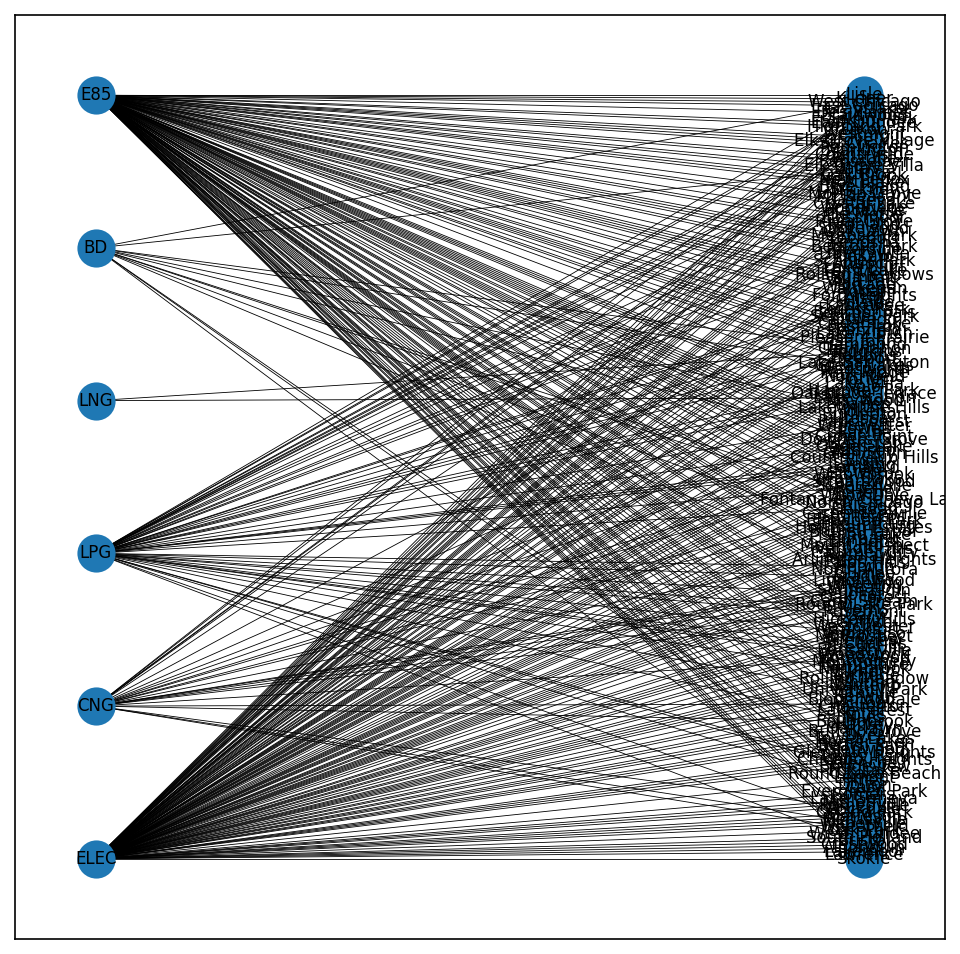

In [33]:
B = nx.Graph()

Fuel = df['Fuel Type Code'].drop_duplicates()
City = df['City'].drop_duplicates()

# Số node và số cạnh
print("Số loại nhiên liệu", Fuel.nunique())
print("Số thành phố", City.nunique())
print("Số cạnh", len(df))

# Thêm node vào đồ thị B
for index, row in df.iterrows():
    B.add_edge(row['Fuel Type Code'], row['City'], weight = 1)
B.add_nodes_from(City, bipartite = 0)
B.add_nodes_from(Fuel, bipartite = 1)

# Vẽ đồ thị 2 phía
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1 ,1 , figsize = (8,8), dpi = 150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B,Fuel), font_size = 8, width = 0.4)

## Đồ thị 1 phía

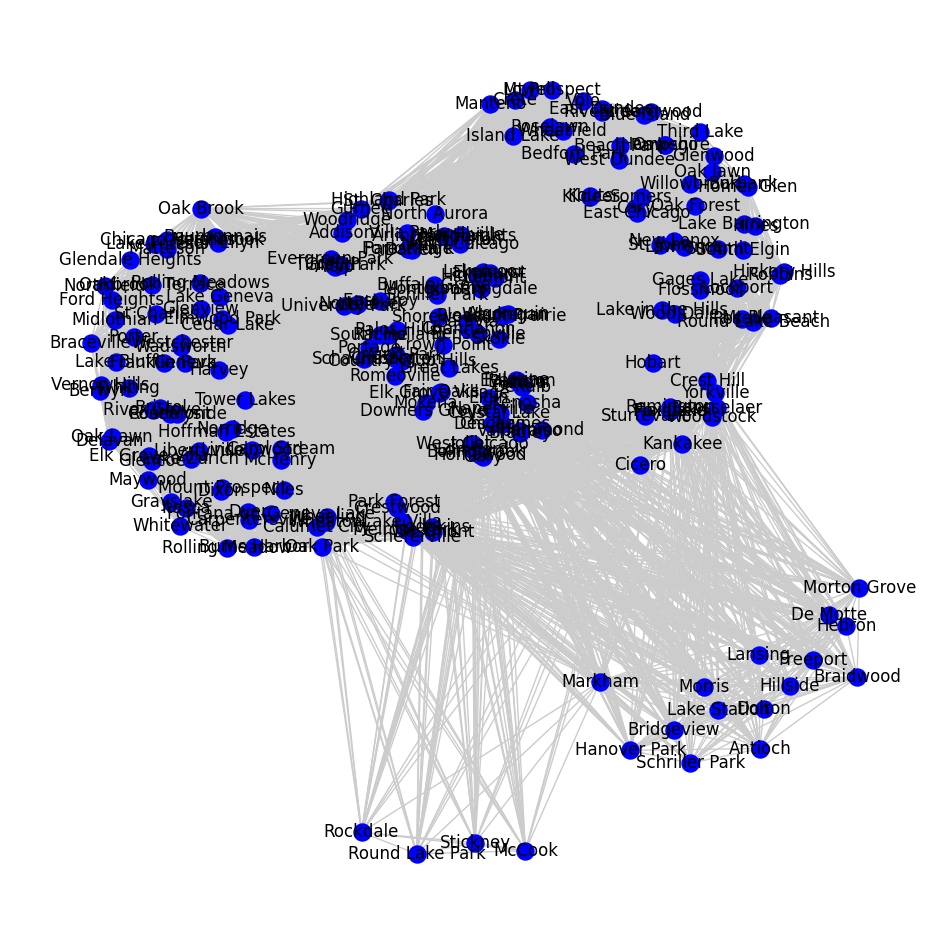

In [34]:
# Đồ thị 1 phía
G = bipartite.weighted_projected_graph(B, City)
plt.figure(figsize = (12, 12))
layout = nx.spring_layout(G)
nx.draw_networkx_nodes(G, layout, nodelist=City, node_size=150, node_color = "blue")
nx.draw_networkx_edges(G, layout, edge_color = "#cccccc")
node_labels = dict(zip(City, City))
nx.draw_networkx_labels(G, layout, labels = node_labels)
plt.axis('off')
plt.show()

In [35]:
# Xuất dữ liệu đồ thị 1 phía ra file csv để thực hiện trên Gephi
lables = nx.get_edge_attributes(G, 'weight')

In [36]:
df2 = pd.DataFrame(columns = ['source', 'target', 'weight'])

In [37]:
for key, value in lables.items():
  df2=df2.append({'source':key[0],'target':key[1],'weight':value}, ignore_index=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-37-7a9f91ea6ef3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append({'source':key[0],'target':key[1],'weight':value}, ignore_index=True)
<ipython-input-37-7a9f91ea6ef3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append({'source':key[0],'target':key[1],'weight':value}, ignore_index=True)
<ipython-input-37-7a9f91ea6ef3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append({'source':key[0],'target':key[1],'weight':value}, ignore_index=True)
<ipython-input-37-7a9f91ea6ef3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append({'

In [38]:
df2.to_csv (r'E:\Learning\MXH\Đồ án\Data\data1.csv',index = False, header=True)

## Thuật toán Louvain

<ipython-input-39-6c5864608225>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap= cm.get_cmap('viridis', max(partition.values()) +1)


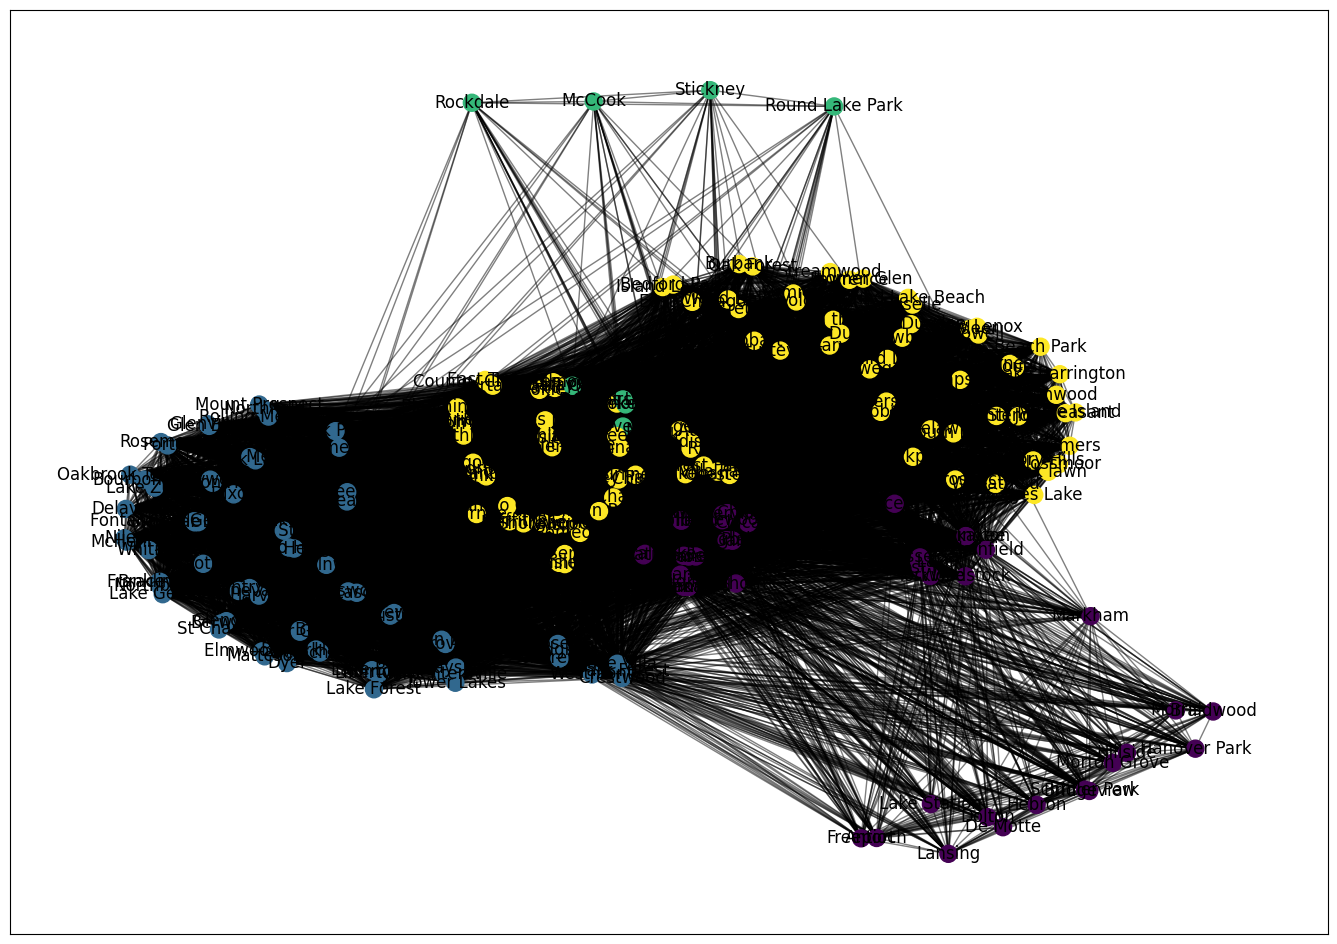

In [39]:
#Thuật toán phát hiện cộng đồng Louvain
import matplotlib.cm as cm
import matplotlib
import community.community_louvain as community_louvain
plt.figure(figsize=(17, 12))
partition = community_louvain.best_partition(G)
pos = nx.spring_layout(G)
cmap= cm.get_cmap('viridis', max(partition.values()) +1)
nx.draw_networkx_nodes(G, pos,partition.keys(), node_size=150,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.show()

In [40]:
# Đếm số cụm
import numpy as np
values= list(partition.values())
print('Number of communities: ',len(np.unique(values)))

Number of communities:  4


In [41]:
# In số node trong các cụm
for i in range(len(np.unique(values))):
  print("Cụm ", i+1 ,"*********************")
  for name,  k in partition.items():
    if k == i:
          print(name)
  print("")

Cụm  1 *********************
Elkhorn
DeKalb
Hillside
Des Plaines
Evanston
Markham
Chicago
Cicero
Braidwood
Kankakee
Rensselaer
De Motte
Woodstock
Lombard
Aurora
Valparaiso
Crystal Lake
Remington
Homewood
West Chicago
Kenosha
Naperville
Lake Station
Lansing
Palatine
Bradley
Elgin
Joliet
Antioch
Bridgeview
Crest Hill
Dolton
Fox Lake
Freeport
Morris
Plainfield
Yorkville
Gary
Bolingbrook
Hanover Park
Hammond
Hebron
Morton Grove
Schriller Park

Cụm  2 *********************
Schererville
Lake Villa
Oak Park
Calumet City
Dyer
Wheeling
Wheaton
Crestwood
Maywood
Countryside
Geneva
Glendale Heights
Burns Harbor
Hoffman Estates
Libertyville
Matteson
Melrose Park
Niles
Oak Lawn
Franklin Park
Wadsworth
River Grove
Hodgkins
Westmont
Cedar Lake
Carol Stream
Glenview
Lake Forest
Northbrook
Northfield
Harvey
Glencoe
Bourbonnais
Chicago Heights
Lake Bluff
Elmwood Park
Whitewater
St Charles
Mount Prospect
Dixon
Rolling Meadows
Park Forest
Oakbrook Terrace
Ford Heights
Oak Brook
Porter
Rosemont
Grayslake
M

In [42]:
List0 = []
for name, k in partition.items():
  if k==0:
    print(name)
    List0.append(name)
Nhom0 = df.query("City in @List0")
Nhom0

Elkhorn
DeKalb
Hillside
Des Plaines
Evanston
Markham
Chicago
Cicero
Braidwood
Kankakee
Rensselaer
De Motte
Woodstock
Lombard
Aurora
Valparaiso
Crystal Lake
Remington
Homewood
West Chicago
Kenosha
Naperville
Lake Station
Lansing
Palatine
Bradley
Elgin
Joliet
Antioch
Bridgeview
Crest Hill
Dolton
Fox Lake
Freeport
Morris
Plainfield
Yorkville
Gary
Bolingbrook
Hanover Park
Hammond
Hebron
Morton Grove
Schriller Park


,Fuel Type Code,City
0,LPG,Elkhorn
1,LPG,DeKalb
2,LPG,Hillside
3,CNG,Des Plaines
5,LPG,Des Plaines
...,...,...
685,LPG,Schriller Park
722,ELEC,Homewood
742,ELEC,West Chicago
760,LPG,Gary


In [43]:
List1 = []
for name, k in partition.items():
  if k==1:
    print(name)
    List1.append(name)
Nhom1 = df.query("City in @List1")
Nhom1

Schererville
Lake Villa
Oak Park
Calumet City
Dyer
Wheeling
Wheaton
Crestwood
Maywood
Countryside
Geneva
Glendale Heights
Burns Harbor
Hoffman Estates
Libertyville
Matteson
Melrose Park
Niles
Oak Lawn
Franklin Park
Wadsworth
River Grove
Hodgkins
Westmont
Cedar Lake
Carol Stream
Glenview
Lake Forest
Northbrook
Northfield
Harvey
Glencoe
Bourbonnais
Chicago Heights
Lake Bluff
Elmwood Park
Whitewater
St Charles
Mount Prospect
Dixon
Rolling Meadows
Park Forest
Oakbrook Terrace
Ford Heights
Oak Brook
Porter
Rosemont
Grayslake
Midlothian
Lincolnwood
Berwyn
Westchester
Elk Grove Villa
Itasca
Vernon Hills
Whiting
Bristol
Braceville
Carpentersville
Delavan
Fontana-on-Geneva Lake
Lake Geneva
Glen Ellyn
McHenry
Norridge
Lake Zurich
Tower Lakes
Rolling Meadow


,Fuel Type Code,City
4,LPG,Schererville
16,LPG,Lake Villa
64,CNG,Oak Park
81,CNG,Calumet City
97,ELEC,Dyer
...,...,...
767,ELEC,Norridge
772,ELEC,Lake Zurich
793,ELEC,Hodgkins
807,ELEC,Tower Lakes


In [44]:
List2 = []
for name, k in partition.items():
  if k==2:
    print(name)
    List2.append(name)
Nhom2 = df.query("City in @List2")
Nhom2

Downers Grove
Great Lakes
Stickney
Round Lake Park
Elk Grove Village
Fair Oaks
Mokena
Rockdale
McCook


,Fuel Type Code,City
21,CNG,Downers Grove
24,E85,Great Lakes
119,E85,Downers Grove
125,CNG,Stickney
146,ELEC,Downers Grove
159,CNG,Round Lake Park
160,CNG,Elk Grove Village
190,BD,Downers Grove
192,CNG,Fair Oaks
194,E85,Mokena


In [45]:
Nhom0.to_excel (r'E:\Learning\MXH\Đồ án\Data Groups\Louvain.xlsx', sheet_name='Nhom0', index = False, header=True)

In [46]:
  with pd.ExcelWriter(r'E:\Learning\MXH\Đồ án\Data Groups\Louvain.xlsx', engine='openpyxl', mode='a') as writer:
      Nhom1.to_excel(writer, sheet_name='Nhom01',index = False, header=True)
      Nhom2.to_excel(writer, sheet_name='Nhom02',index = False, header=True)

## Thuật toán Girvan Newman

Phân cụm
[['Skokie', 'Lakemoor', 'Lawrence', 'Algonquin', 'Crestwood', 'Bristol', 'South Holland', 'West Dundee', 'Naperville', 'Wheatfield', 'Matteson', 'Merrillville', 'Oak Park', 'Orland Park', 'Rockdale', 'Romeoville', 'Midlothian', 'Lake Geneva', 'Somers', 'Evergreen Park', 'Cary', 'Hines', 'Dolton', 'Lemont', 'Round Lake Beach', 'Fox Lake', 'Glencoe', 'Bridgeview', 'Chicago Heights', 'Tinley Park', 'Glenwood', 'Glendale Heights', 'Beach Park', 'Homer Glen', 'Tower Lakes', 'Dyer', 'Buffalo Grove', 'Oak lawn', 'Harvey', 'Bolingbrook', 'Niles', 'Kouts', 'Lake Forest', 'Chesterton', 'McCook', 'Bloomingdale', 'Berwyn', 'Manteno', 'University Park', 'Whiting', 'Yorkville', 'Rolling Meadow', 'Norridge', 'Elkhorn', 'Hampshire', 'Northbrook', 'Montgomery', 'Homewood', 'Bensenville', 'Woodstock', 'Crest Hill', 'St Charles', 'Glenview', 'Mt Prospect', 'Valparaiso', 'Frankfort', 'Griffith', 'Westchester', 'Hickory Hills', 'Rosemont', 'Gary', 'Morris', 'Carol Stream', 'Round Lake Park', 'Oak 

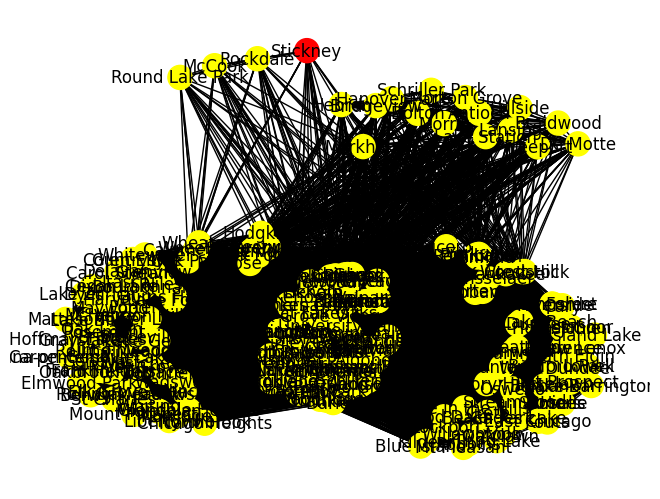

In [47]:
def edge_to_remove(G):
  G_dict = nx.edge_betweenness_centrality(G)
  edge = ()
  # trích xuất cạnh có điểm trung tâm giữa cạnh cao nhất
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break
  return edge
def girvan_newman(graph):
	# tìm số lượng các thành phần được kết nối
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg
c = girvan_newman(G.copy())
# tìm các nút hình thành cộng đồng
# Tim node
node_groups = []
for i in c:
  node_groups.append(list(i))
print("Phân cụm")
print (node_groups)
#mau 2 cong dong
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('yellow')
    else:
        color_map.append('red')
#Ve girvan newman
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

## Closeness centrality

In [48]:
# Độ đo closeness centrality
closeness_centrality = nx.closeness_centrality(G)
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
  print(node, closeness_centrality[node])

Des Plaines 1.0
Chicago 1.0
Lombard 1.0
Homewood 1.0
West Chicago 1.0
Naperville 1.0
Joliet 1.0
Gary 1.0
Bolingbrook 1.0
Elkhorn 0.9819004524886877
DeKalb 0.9819004524886877
Evanston 0.9819004524886877
Aurora 0.9819004524886877
Valparaiso 0.9819004524886877
Crystal Lake 0.9819004524886877
Kenosha 0.9819004524886877
Palatine 0.9819004524886877
Bradley 0.9819004524886877
Elgin 0.9819004524886877
Hammond 0.9819004524886877
Downers Grove 0.9393939393939394
Great Lakes 0.9393939393939394
Elk Grove Village 0.9393939393939394
Fair Oaks 0.9393939393939394
Mokena 0.9393939393939394
Lemont 0.9194915254237288
Batavia 0.9194915254237288
Romeoville 0.9194915254237288
Schaumburg 0.9194915254237288
North Aurora 0.9194915254237288
Highland 0.9194915254237288
Merrillville 0.9194915254237288
Skokie 0.9194915254237288
Portage 0.9194915254237288
Chesterton 0.9194915254237288
Crown Point 0.9194915254237288
Lisle 0.9194915254237288
Elmhurst 0.9194915254237288
University Park 0.9194915254237288
Racine 0.9194

## PageRank

In [49]:
#PageRank
pagerank = nx.pagerank(G)
for node in sorted(pagerank,key=pagerank.get,reverse=True):
    print(node,pagerank[node])

West Chicago 0.008378668466395952
Naperville 0.008378668466395952
Des Plaines 0.00813309061908289
Chicago 0.00813309061908289
Lombard 0.00813309061908289
Homewood 0.00813309061908289
Joliet 0.00813309061908289
Gary 0.00813309061908289
Bolingbrook 0.00813309061908289
Elkhorn 0.007520269174137195
DeKalb 0.007520269174137195
Evanston 0.007520269174137195
Aurora 0.007520269174137195
Valparaiso 0.007520269174137195
Crystal Lake 0.007520269174137195
Kenosha 0.007520269174137195
Palatine 0.007520269174137195
Bradley 0.007520269174137195
Elgin 0.007520269174137195
Hammond 0.007520269174137195
Downers Grove 0.007180997221801828
Great Lakes 0.007180997221801828
Elk Grove Village 0.006935393014408322
Fair Oaks 0.006935393014408322
Mokena 0.006935393014408322
Lemont 0.006568081736758332
Batavia 0.006568081736758332
North Aurora 0.006568081736758332
North Chicago 0.006568081736758332
Channahon 0.006568081736758332
Romeoville 0.006322474730791447
Schaumburg 0.006322474730791447
Highland 0.0063224747

## Betweenness centrality

In [50]:
# Độ đo betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
  print(node, betweenness_centrality[node])

Des Plaines 0.007363416396654367
Chicago 0.007363416396654367
Lombard 0.007363416396654367
Homewood 0.007363416396654367
West Chicago 0.007363416396654367
Naperville 0.007363416396654367
Joliet 0.007363416396654367
Gary 0.007363416396654367
Bolingbrook 0.007363416396654367
Elkhorn 0.005524697490678456
DeKalb 0.005524697490678456
Evanston 0.005524697490678456
Aurora 0.005524697490678456
Valparaiso 0.005524697490678456
Crystal Lake 0.005524697490678456
Kenosha 0.005524697490678456
Palatine 0.005524697490678456
Bradley 0.005524697490678456
Elgin 0.005524697490678456
Hammond 0.005524697490678456
Downers Grove 0.003921481917147264
Great Lakes 0.003921481917147264
Elk Grove Village 0.003921481917147264
Fair Oaks 0.003921481917147264
Mokena 0.003921481917147264
Cicero 0.003651189723397394
Schererville 0.0026342640580194333
Lake Villa 0.0026342640580194333
Crestwood 0.0026342640580194333
Melrose Park 0.0026342640580194333
Hodgkins 0.0026342640580194333
Westmont 0.0026342640580194333
Park Fores

## Thuật toán Kmeans

In [51]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
k = preprocessing.LabelEncoder()
df2 = df.copy()

In [52]:
# Chuyển cột city  thành cột có giá trị số tương ứng
k.fit(df2['City'])
df2['Citynum'] = k.transform(df2['City'])
df2['Citynum'].drop_duplicates()

0       56
1       43
2       90
3       45
4      179
      ... 
772    110
776    174
804     91
807    196
839    170
Name: Citynum, Length: 218, dtype: int64

In [53]:
# Chuyển cột Fuel Type code thành cột có giá trị số tương ứng
k.fit(df2['Fuel Type Code'])
df2['Fuel Type Code num'] = k.transform(df2['Fuel Type Code'])
df2['Fuel Type Code num'].drop_duplicates()

0      5
3      1
12     2
80     3
94     0
124    4
Name: Fuel Type Code num, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

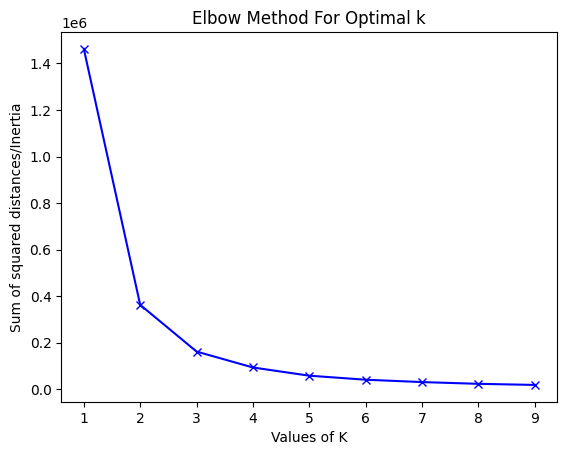

In [54]:
# Dự đoán số cụm xuất hiện trong Kmeans bằng phương pháp Elbow
import numpy as np
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df2[['Citynum','Fuel Type Code num']])
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


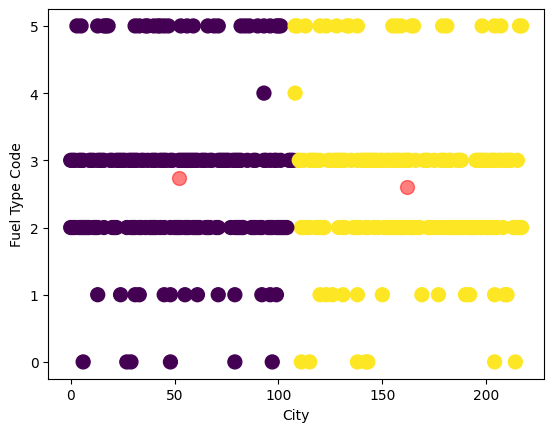

Toạ độ trung tâm cụm:  [[ 52.16842105   2.74210526]
 [162.07428571   2.60571429]]


In [55]:
#Vẽ thuật toán Kmeans
algorithm = KMeans(n_clusters = 2 ,init='random' )
algorithm.fit(df2[['Citynum','Fuel Type Code num']])
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_ #Gán toạ độ trung tâm cụm
plt.clf()
plt.scatter( x = 'Citynum' ,y = 'Fuel Type Code num' , data = df2[['Citynum','Fuel Type Code num']] , c = labels2 , s = 100 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 100 , c = 'red' , alpha = 0.5)
plt.ylabel('Fuel Type Code') , plt.xlabel('City')
plt.show()
print('Toạ độ trung tâm cụm: ',centroids2)

In [56]:
noteGenre = df2.drop_duplicates(subset='City', keep="last")
print('Số City: ',len(noteGenre[['City','Citynum']]))
print(noteGenre[['City','Citynum']].to_string())

Số City:  218
                       City  Citynum
2                  Hillside       90
14                Braidwood       17
18                 De Motte       42
26                   Oswego      154
29               Homer Glen       95
31                Riverside      167
37               Wheatfield      208
39                    Kouts      103
60               Gages Lake       70
62                 Roselawn      173
66              East Dundee       51
70               Rensselaer      165
75                 Lawrence      114
80                  Chicago       31
90                  Robbins      168
96                     Volo      201
97                     Dyer       49
109                Lockport      119
110                  Lowell      121
112              Sturtevant      192
116               Remington      164
117                 Elkhorn       56
118            Merrillville      129
125                Stickney      190
126                 Lansing      113
134                  Sko

In [57]:
noteGenre = df2.drop_duplicates(subset='Fuel Type Code', keep="last")
print('Số mã loại nhiên liệu: ',len(noteGenre[['Fuel Type Code','Fuel Type Code num']]))
print(noteGenre[['Fuel Type Code','Fuel Type Code num']].to_string())

Số mã loại nhiên liệu:  6
    Fuel Type Code  Fuel Type Code num
488            LNG                   4
760            LPG                   5
774             BD                   0
792            CNG                   1
826            E85                   2
853           ELEC                   3


In [58]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df2[['Fuel Type Code num', 'Citynum' ]])
df2['cluster']= y_predicted
df2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Fuel Type Code,City,Citynum,Fuel Type Code num,cluster
0,LPG,Elkhorn,56,5,1
1,LPG,DeKalb,43,5,1
2,LPG,Hillside,90,5,1
3,CNG,Des Plaines,45,1,1
4,LPG,Schererville,179,5,0
...,...,...,...,...,...
817,ELEC,Lakemoor,112,3,0
823,ELEC,Shorewood,182,3,0
826,E85,East Troy,52,2,1
839,ELEC,Rolling Meadow,170,3,0


In [59]:
df2

,Fuel Type Code,City,Citynum,Fuel Type Code num,cluster
0,LPG,Elkhorn,56,5,1
1,LPG,DeKalb,43,5,1
2,LPG,Hillside,90,5,1
3,CNG,Des Plaines,45,1,1
4,LPG,Schererville,179,5,0
...,...,...,...,...,...
817,ELEC,Lakemoor,112,3,0
823,ELEC,Shorewood,182,3,0
826,E85,East Troy,52,2,1
839,ELEC,Rolling Meadow,170,3,0
